In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



In [2]:
import numpy as np
import pandas as pd
import glob

In [3]:
from gi import histoplot, scatter_xy, scatter_xyze, plot_time, plot_amplitude
from gi import event_size, event_edep, event_mult, event_class, fiducial_df, twocluster_df, add_distances, three_cluster_df
from controlHistos import read_histograms, plot_histogram
from imgs import select_image_from_df, select_image_from_df3, plot_image, select_event, plot_event

## Control Histograms
- Read control histogram file and plot control histograms

In [4]:
rootdir = "/Users/jjgomezcadenas/Data/G4Prods/crystalGI/Test"
filenm = "control_histograms_test_1.txt"

In [5]:
chist = read_histograms(f"{rootdir}/{filenm}")

In [6]:
chist.keys()

dict_keys(['Charge', 'DecayTime', 'EDEP', 'STEPL', 'TimeBin', 'TotalEnergy', 'TotalEnergyFirstTimeBin', 'X0', 'Y0', 'Z0'])

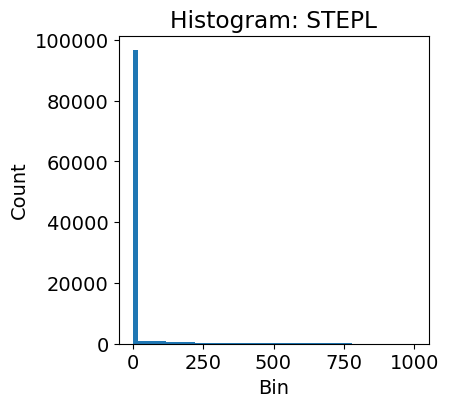

In [7]:
plot_histogram(chist, 'STEPL', figsize=(4, 4))

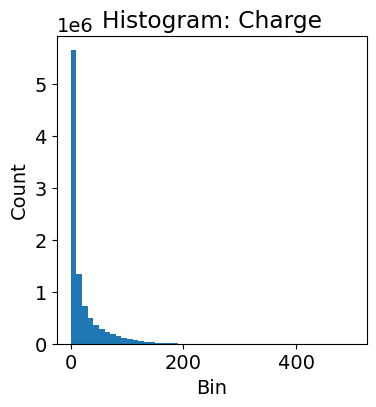

In [8]:
plot_histogram(chist, 'Charge', figsize=(4, 4))

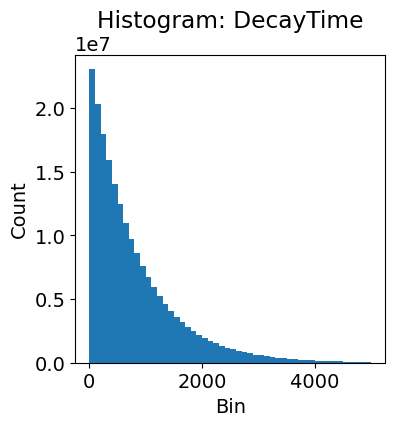

In [9]:
plot_histogram(chist, 'DecayTime', figsize=(4, 4))

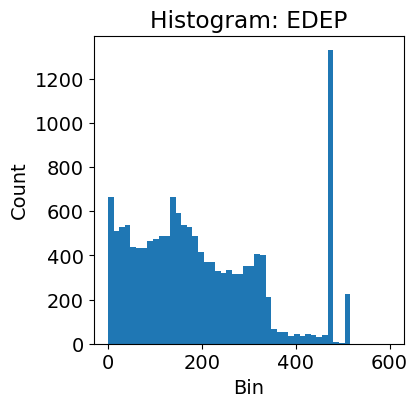

In [10]:
plot_histogram(chist, 'EDEP', figsize=(4, 4))

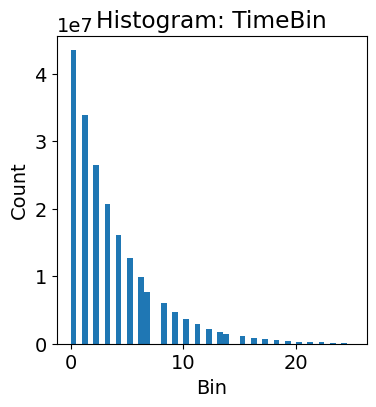

In [11]:
plot_histogram(chist, 'TimeBin', figsize=(4, 4))

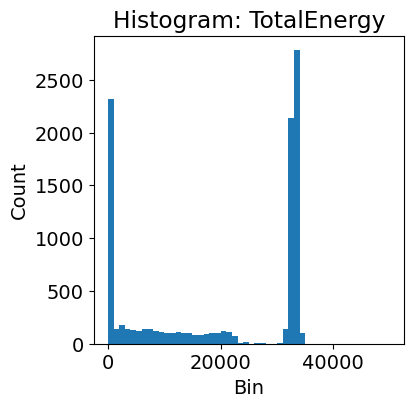

In [12]:
plot_histogram(chist, 'TotalEnergy', figsize=(4, 4))

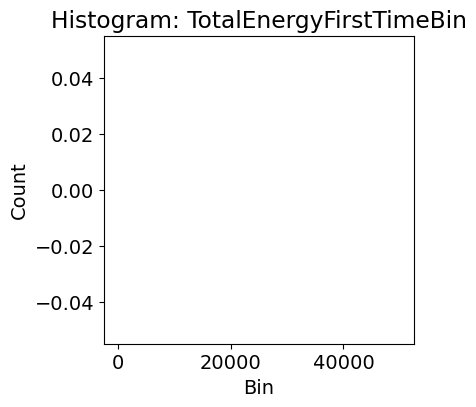

In [13]:
plot_histogram(chist, 'TotalEnergyFirstTimeBin', figsize=(4, 4))

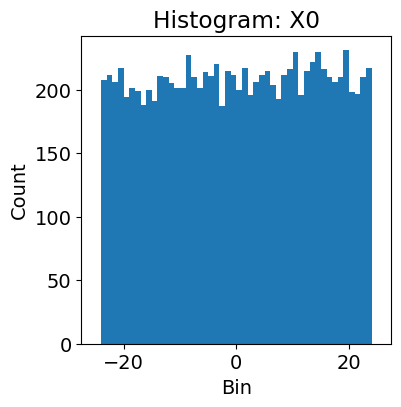

In [14]:
plot_histogram(chist, 'X0', figsize=(4, 4))

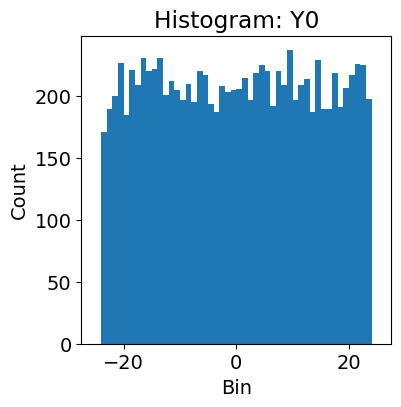

In [15]:
plot_histogram(chist, 'Y0', figsize=(4, 4))

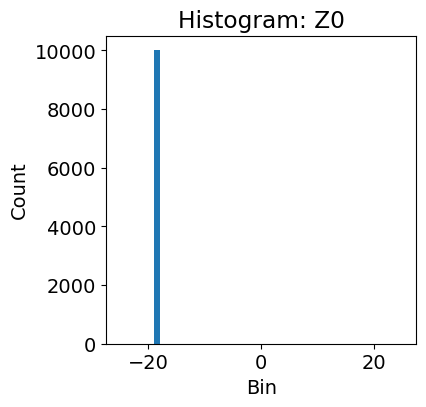

In [16]:
plot_histogram(chist, 'Z0', figsize=(4, 4))

## Read gamma interaction file

In [17]:
filenm = "gamma_interactions_test_1.csv"

In [22]:
df = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')

In [23]:
df.head(10)

,event,time,x,y,z,edep
0,0,45.1,20.2,-6.4,-5.0,297.7
5,0,57.6,16.7,-6.7,-6.5,213.3
21,1,24.6,-10.1,-19.9,-11.1,4.7
24,2,117.1,8.6,-21.6,16.6,124.2
32,3,144.9,6.9,-12.3,11.0,258.9
31,3,111.1,2.1,-20.4,14.7,123.3
52,4,103.3,8.3,-5.8,5.4,178.8
51,4,90.5,9.2,-4.0,8.6,332.2
66,5,157.7,11.4,19.9,17.0,127.6
65,5,151.0,10.7,18.8,15.5,69.5


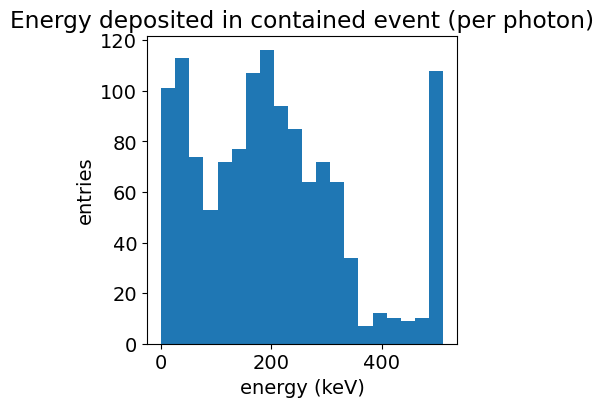

In [30]:
b, e = histoplot(df.edep, 'energy (keV)', "entries", bins=20, figsize=(6,6),
                title="Energy deposited in contained event (per photon)")

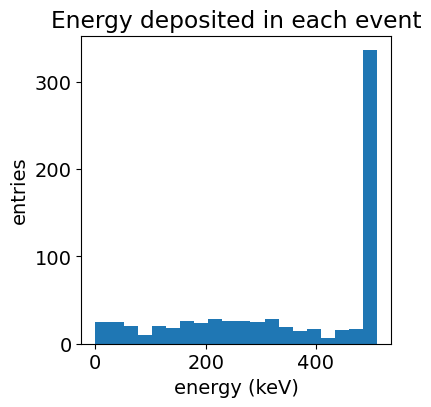

In [29]:
b, e = histoplot(event_edep(df), 'energy (keV)', "entries", bins=20, figsize=(6,6),
                title="Energy deposited in each event")

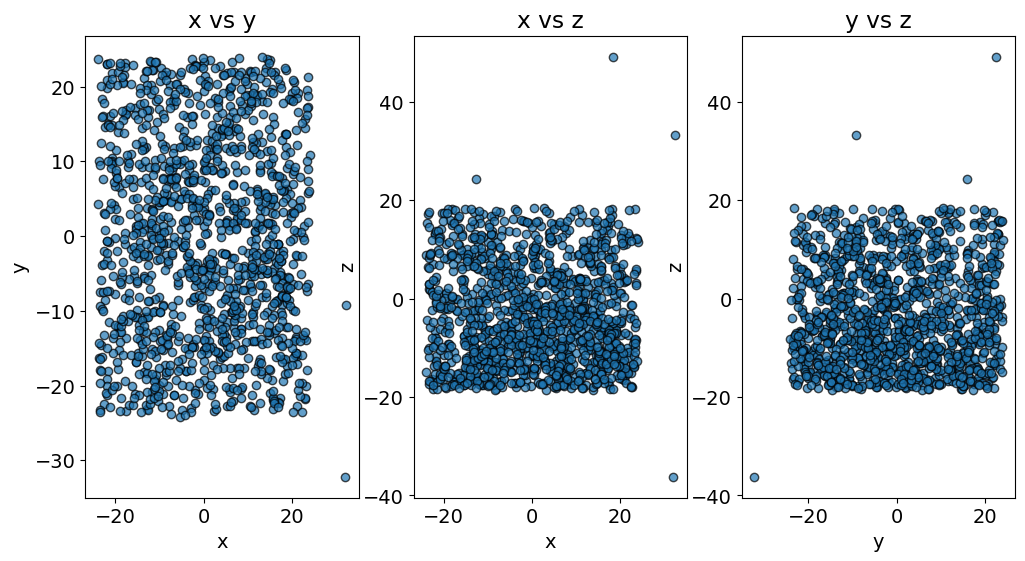

In [27]:
scatter_xy(df, figsize=(12, 6))

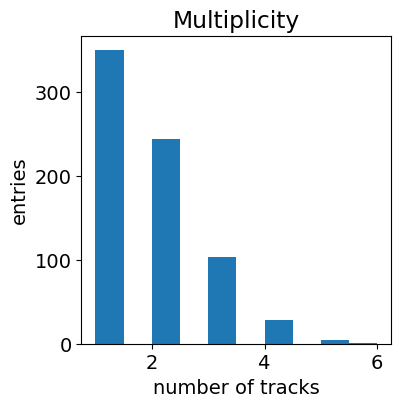

In [28]:
b, e = histoplot(event_mult(df), 'number of tracks', "entries", bins=10, figsize=(6,6),
                title="Multiplicity")

In [31]:
event_size(df)

728

### Define a fiducial dataframe
- cut events where motherid not 1
- Impose to be inside crystal dimensions
- Tracklength less than 1 mm.
- add total energy and number of particles in the event
- remove mass and motherid (its alwasy e-,  and 1)

In [33]:
dfx = fiducial_df(df, d=48.2, z=37.2)

In [34]:
dfx.head(10)

,event,time,x,y,z,edep,etot,ntrk
0,0,45.1,20.2,-6.4,-5.0,297.7,511.0,2
1,0,57.6,16.7,-6.7,-6.5,213.3,511.0,2
2,1,24.6,-10.1,-19.9,-11.1,4.7,4.7,1
3,2,117.1,8.6,-21.6,16.6,124.2,124.2,1
4,3,144.9,6.9,-12.3,11.0,258.9,382.2,2
5,3,111.1,2.1,-20.4,14.7,123.3,382.2,2
6,4,103.3,8.3,-5.8,5.4,178.8,511.0,2
7,4,90.5,9.2,-4.0,8.6,332.2,511.0,2
8,5,157.7,11.4,19.9,17.0,127.6,511.1,5
9,5,151.0,10.7,18.8,15.5,69.5,511.1,5


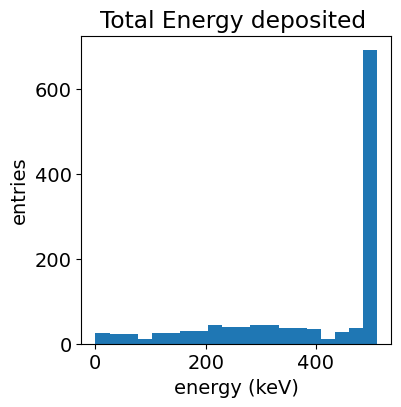

In [38]:
b, e = histoplot(dfx.etot, 'energy (keV)', "entries", bins=20, figsize=(6,6),
                title="Total Energy deposited ")

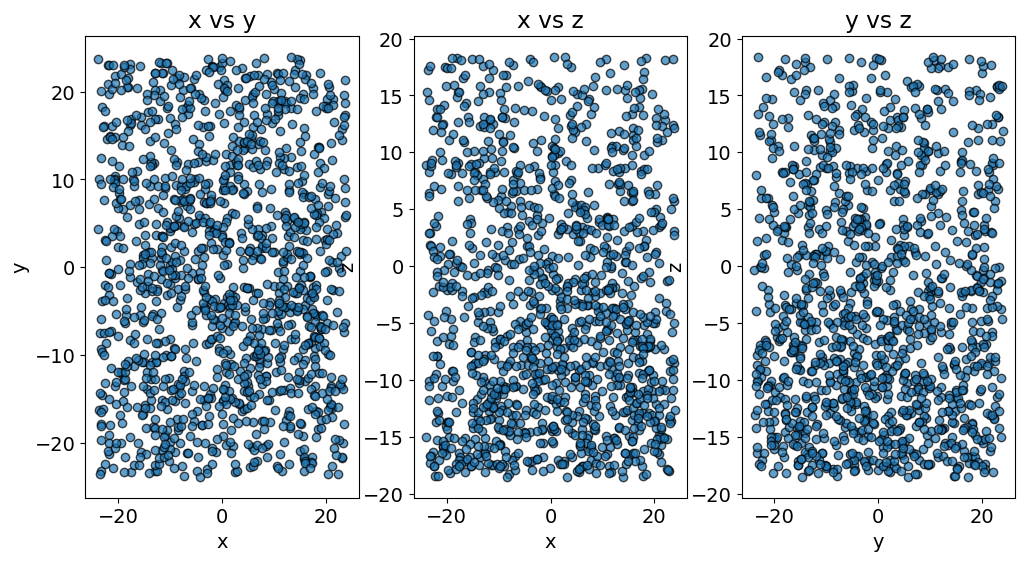

In [39]:
scatter_xy(dfx, figsize=(12, 6))

In [40]:
event_size(dfx)/event_size(df)

0.9972527472527473

### Cut in energy
- Only events with energy near the photopeak are relevant

In [41]:
dfe = dfx[dfx.etot>500]

In [42]:
dfe.head(10)

,event,time,x,y,z,edep,etot,ntrk
0,0,45.1,20.2,-6.4,-5.0,297.7,511.0,2
1,0,57.6,16.7,-6.7,-6.5,213.3,511.0,2
6,4,103.3,8.3,-5.8,5.4,178.8,511.0,2
7,4,90.5,9.2,-4.0,8.6,332.2,511.0,2
8,5,157.7,11.4,19.9,17.0,127.6,511.1,5
9,5,151.0,10.7,18.8,15.5,69.5,511.1,5
10,5,140.7,10.7,17.4,18.2,205.4,511.1,5
11,5,95.0,1.5,11.6,9.9,94.3,511.1,5
12,5,82.8,0.6,11.5,6.3,14.3,511.1,5
13,6,12.2,7.3,1.1,-14.8,511.0,511.0,1


In [43]:
event_size(dfe)/event_size(df)

0.45054945054945056

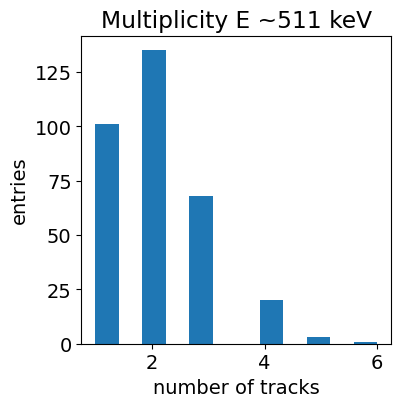

In [45]:
b, e = histoplot(event_mult(dfe), 'number of tracks', "entries", bins=12, figsize=(6,6),
                title="Multiplicity E ~511 keV")

### Create a two-cluster df

In [58]:
df2c = twocluster_df(dfe)

In [59]:
add_distances(df2c)

In [60]:
df2c.head(10)

,index,event,etot,ntrk,t1,x1,y1,z1,e1,t2,...,e2,x12,y12,z12,xb,yb,zb,d12,d12b,d1b
0,0,0,511.0,2,45.1,20.2,-6.4,-5.0,297.7,57.6,...,213.3,18.739041,-6.525225,-5.626125,18.739041,-6.525225,-5.626125,3.819686,0.000000,1.594401
1,1,4,511.0,2,90.5,9.2,-4.0,8.6,332.2,103.3,...,178.8,8.885088,-4.629824,7.480313,8.885088,-4.629824,7.480313,3.780212,0.000000,1.322704
2,2,5,511.1,5,82.8,0.6,11.5,6.3,14.3,95.0,...,94.3,0.293543,2.462004,2.002857,8.894737,16.979319,15.668930,3.712142,21.713925,10.012229
3,3,6,511.0,1,12.2,7.3,1.1,-14.8,511.0,12.2,...,511.0,7.300000,1.100000,-14.800000,7.300000,1.100000,-14.800000,0.000000,0.000000,0.000000
4,4,8,511.0,1,7.1,-17.6,-23.4,-16.4,511.0,7.1,...,511.0,-17.600000,-23.400000,-16.400000,-17.600000,-23.400000,-16.400000,0.000000,0.000000,0.000000
5,5,9,511.0,2,98.7,21.4,19.2,11.1,338.7,115.2,...,172.3,20.961663,19.200000,9.481526,20.961663,19.200000,9.481526,4.972927,0.000000,1.676781
6,6,10,511.0,1,22.8,-14.2,1.7,-11.7,511.0,22.8,...,511.0,-14.200000,1.700000,-11.700000,-14.200000,1.700000,-11.700000,0.000000,0.000000,0.000000
7,7,11,511.0,1,32.6,-14.9,-2.9,-8.7,511.0,32.6,...,511.0,-14.900000,-2.900000,-8.700000,-14.900000,-2.900000,-8.700000,0.000000,0.000000,0.000000
8,8,12,511.0,1,91.4,-24.0,4.3,8.9,511.0,91.4,...,511.0,-24.000000,4.300000,8.900000,-24.000000,4.300000,8.900000,0.000000,0.000000,0.000000
9,9,14,511.0,4,17.4,-13.9,9.2,-13.3,45.5,95.9,...,149.7,-3.171174,4.276047,1.276575,-5.082250,9.926008,7.801292,23.042135,8.840034,18.757120


In [61]:
dfpe = df2c[df2c.ntrk==1]
dfco = df2c[df2c.ntrk>1]
print(f"Fraction of photoelectric events  = {event_size(dfpe)/event_size(df2c)}, of compton = {event_size(dfco)/event_size(df2c)}")
print(f"wrt total phe  = {event_size(dfpe)/event_size(df)}, compton = {event_size(dfco)/event_size(df)}")

Fraction of photoelectric events  = 0.3079268292682927, of compton = 0.6920731707317073
wrt total phe  = 0.13873626373626374, compton = 0.3118131868131868


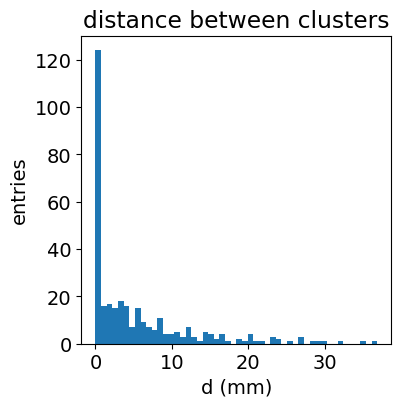

In [62]:
b, e = histoplot(df2c.d12, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between clusters")

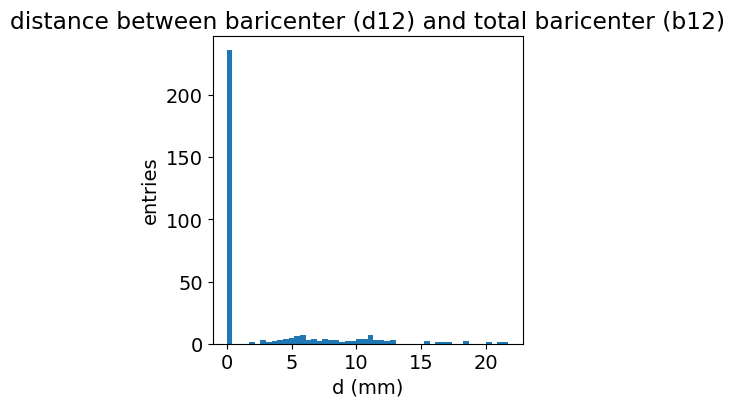

In [63]:
b, e = histoplot(df2c.d12b, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between baricenter (d12) and total baricenter (b12)")

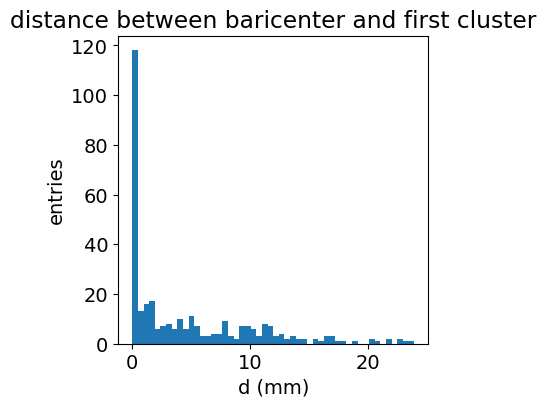

In [64]:
b, e = histoplot(df2c.d1b, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between baricenter and first cluster")

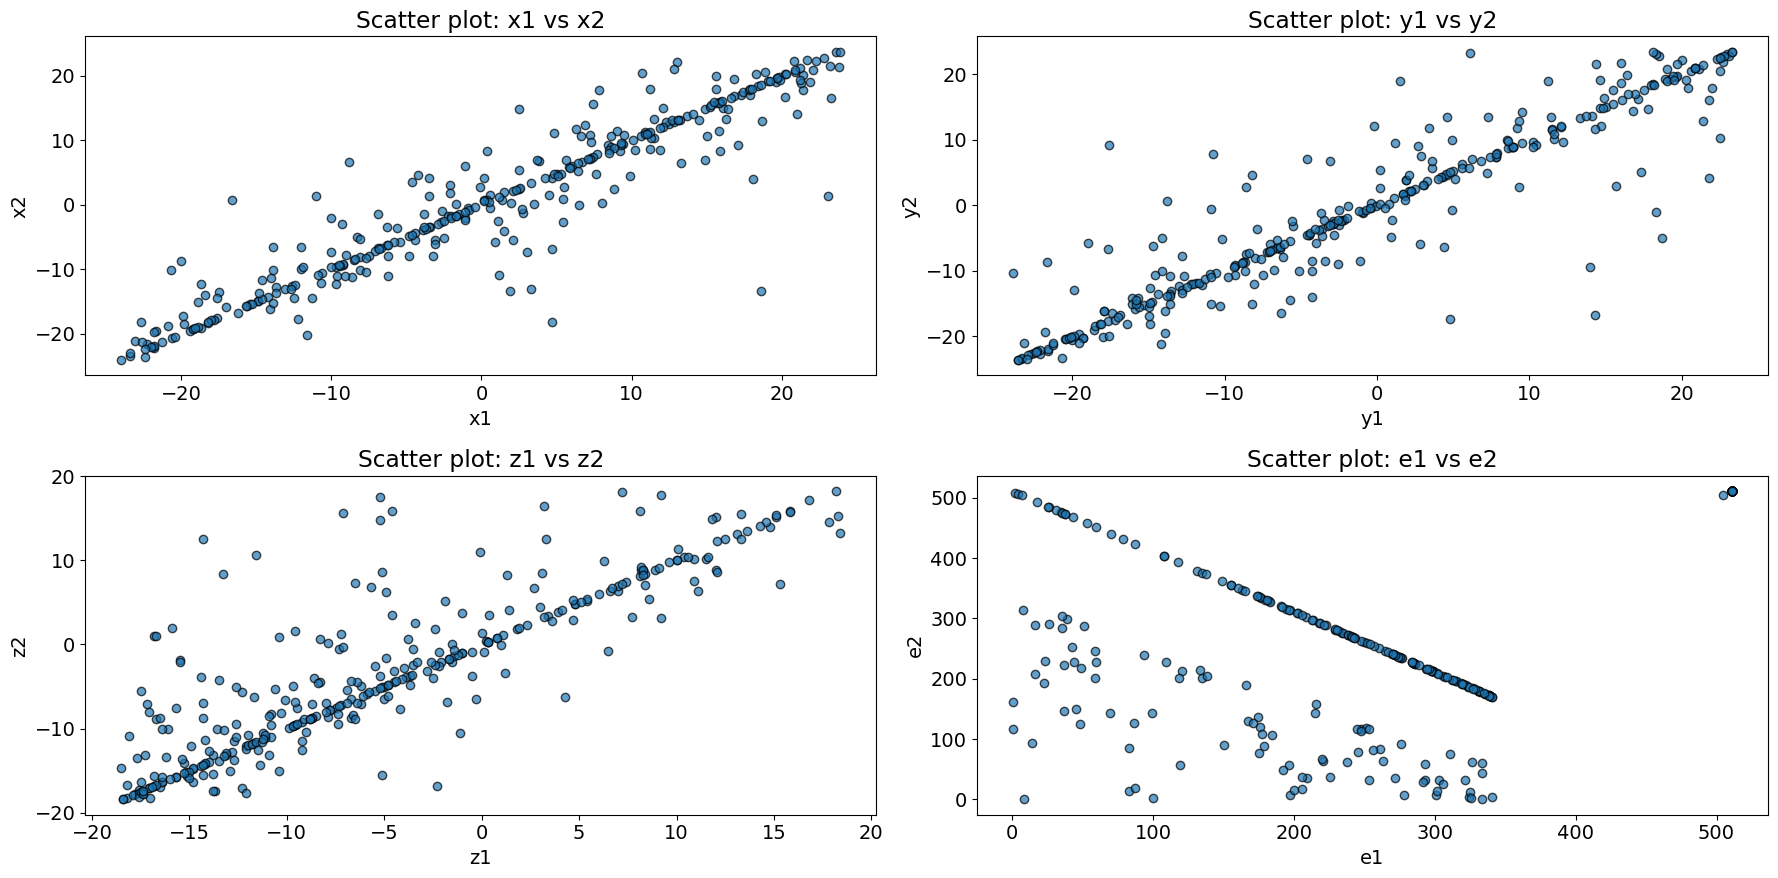

In [65]:
scatter_xyze(df2c)

## Optical photons

### Sensor data

In [66]:
filenm = "sensor_data_test_1.csv"

In [67]:
dfp = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')

In [68]:
dfp.head(10)

,event,sensor_id,time,charge
6102,0,10,7,20
6478,0,31,12,8
6475,0,31,11,7
6474,0,31,10,7
6473,0,31,9,11
6457,0,31,8,10
6456,0,31,7,19
6455,0,31,6,21
6479,0,31,13,6
6454,0,31,5,27


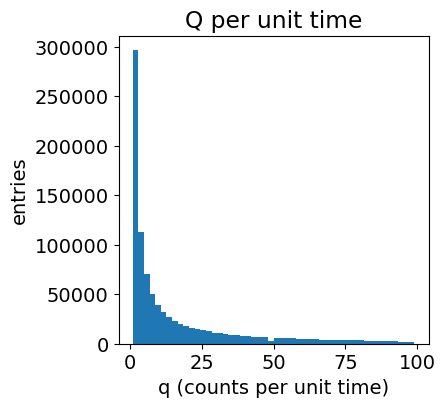

In [69]:
b, e = histoplot(dfp.charge[dfp.charge<100], 'q (counts per unit time)', "entries", bins=50, figsize=(6,6),
                title="Q per unit time")

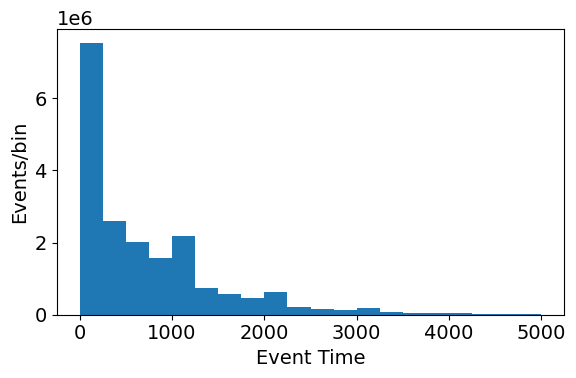

In [70]:
plot_time(dfp, num_bins = 20, xmin=0.0, xmax=5e+3, timebin=200, figsize=(6, 4), title="")

### Integrated sensor data

In [71]:
filenm = "isensor_data_test_1.csv"
dfi = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')

In [72]:
dfi.head(10)

,event,sensor_id,amplitude
319,0,6,354
306,0,20,487
343,0,61,487
342,0,33,625
287,0,8,330
340,0,0,318
338,0,30,451
289,0,47,432
336,0,55,431
334,0,39,432


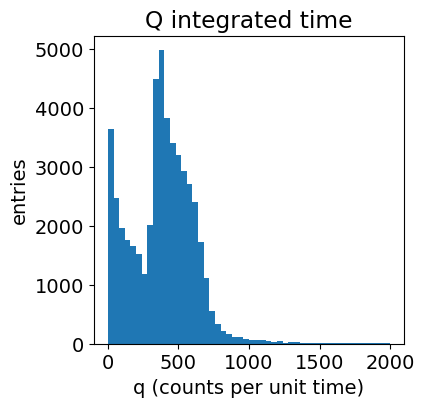

In [73]:
b, e = histoplot(dfi.amplitude[dfi.amplitude<2000], 'q (counts per unit time)', "entries", bins=50, figsize=(6,6),
                title="Q integrated time")

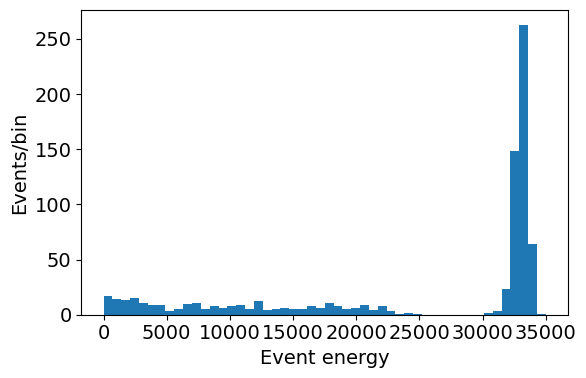

In [74]:
b, e = plot_amplitude(dfi, num_bins = 50, xmin=0, xmax=3.5e+4,figsize=(6, 4), title="")

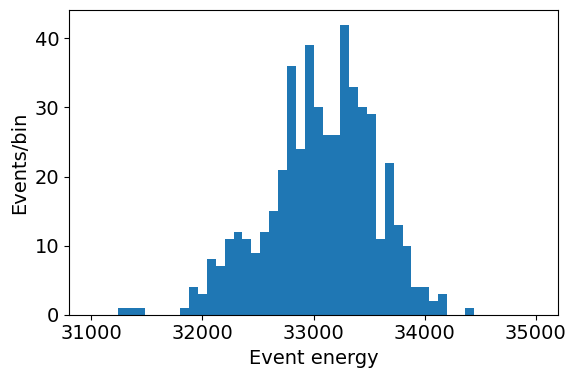

In [75]:
b, e = plot_amplitude(dfi, num_bins = 50, xmin=31000, xmax=3.5e+4,figsize=(6, 4), title="")

In [76]:
np.std(e)/np.mean(e)

0.035683882288193323

### Sensor positions

In [77]:
filenm = "sensor_positions.csv"
dfs = pd.read_csv(f"{rootdir}/{filenm}", header=0)

In [80]:
dfs.head(20)

,sensor_id,sensor_x,sensor_y,sensor_z
0,0,-21,-21,19.1
1,1,-21,-15,19.1
2,2,-21,-9,19.1
3,3,-21,-3,19.1
4,4,-21,3,19.1
5,5,-21,9,19.1
6,6,-21,15,19.1
7,7,-21,21,19.1
8,8,-15,-21,19.1
9,9,-15,-15,19.1


In [79]:
dfs.sensor_x.values

array([-21, -21, -21, -21, -21, -21, -21, -21, -15, -15, -15, -15, -15,
       -15, -15, -15,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -3,  -3,
        -3,  -3,  -3,  -3,  -3,  -3,   3,   3,   3,   3,   3,   3,   3,
         3,   9,   9,   9,   9,   9,   9,   9,   9,  15,  15,  15,  15,
        15,  15,  15,  15,  21,  21,  21,  21,  21,  21,  21,  21])

In [87]:
dfs.sensor_y.values

array([-21, -15,  -9,  -3,   3,   9,  15,  21, -21, -15,  -9,  -3,   3,
         9,  15,  21, -21, -15,  -9,  -3,   3,   9,  15,  21, -21, -15,
        -9,  -3,   3,   9,  15,  21, -21, -15,  -9,  -3,   3,   9,  15,
        21, -21, -15,  -9,  -3,   3,   9,  15,  21, -21, -15,  -9,  -3,
         3,   9,  15,  21, -21, -15,  -9,  -3,   3,   9,  15,  21])

## Images

In [85]:
x_spatial = dfs.sensor_x.values
y_spatial = dfs.sensor_y.values


### Plot a few events

In [81]:
evtsel = 0
charge_matrix = select_image_from_df(dfi,evtsel)


In [82]:
charge_matrix

array([[318., 393., 362., 381., 371., 340., 354., 344.],
       [330., 424., 455., 418., 458., 447., 404., 354.],
       [460., 473., 548., 531., 487., 434., 435., 381.],
       [463., 508., 588., 571., 570., 474., 451., 397.],
       [543., 625., 640., 655., 655., 556., 495., 432.],
       [645., 762., 801., 684., 668., 631., 467., 432.],
       [566., 704., 745., 673., 659., 549., 483., 431.],
       [490., 691., 658., 630., 579., 487., 552., 429.]])

In [109]:
df2c

,index,event,etot,ntrk,t1,x1,y1,z1,e1,t2,...,e2,x12,y12,z12,xb,yb,zb,d12,d12b,d1b
0,0,0,511.0,2,45.1,20.2,-6.4,-5.0,297.7,57.6,...,213.3,18.739041,-6.525225,-5.626125,18.739041,-6.525225,-5.626125,3.819686,0.000000,1.594401
1,1,4,511.0,2,90.5,9.2,-4.0,8.6,332.2,103.3,...,178.8,8.885088,-4.629824,7.480313,8.885088,-4.629824,7.480313,3.780212,0.000000,1.322704
2,2,5,511.1,5,82.8,0.6,11.5,6.3,14.3,95.0,...,94.3,0.293543,2.462004,2.002857,8.894737,16.979319,15.668930,3.712142,21.713925,10.012229
3,3,6,511.0,1,12.2,7.3,1.1,-14.8,511.0,12.2,...,511.0,7.300000,1.100000,-14.800000,7.300000,1.100000,-14.800000,0.000000,0.000000,0.000000
4,4,8,511.0,1,7.1,-17.6,-23.4,-16.4,511.0,7.1,...,511.0,-17.600000,-23.400000,-16.400000,-17.600000,-23.400000,-16.400000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,323,980,511.0,2,23.2,-18.9,-6.1,-11.5,283.5,36.5,...,227.5,-17.163699,-6.055479,-11.945205,-17.163699,-6.055479,-11.945205,4.027406,0.000000,1.793023
324,324,981,511.0,3,19.6,-1.1,4.8,-12.6,35.3,31.1,...,303.9,-1.443836,3.364638,-6.460744,-2.317965,4.608591,-11.335695,3.430743,5.106532,6.314187
325,325,985,511.0,1,103.4,4.2,-10.9,12.5,511.0,103.4,...,511.0,4.200000,-10.900000,12.500000,4.200000,-10.900000,12.500000,0.000000,0.000000,0.000000
326,326,993,504.3,1,8.3,-19.1,14.8,-16.0,504.3,8.3,...,504.3,-19.100000,14.800000,-16.000000,-19.100000,14.800000,-16.000000,0.000000,0.000000,0.000000


In [118]:
sel_events = df2c.event.values

xg1 = 20.2, yg1 =-6.4
xg2 = 20.2, yg2 =-6.4
7.847619047619048 2.780952380952381
7.180952380952381 2.723809523809524


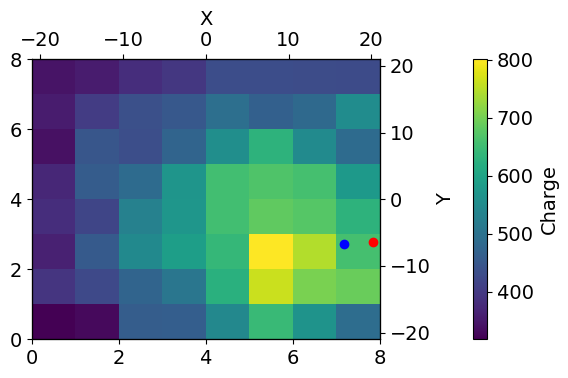

In [124]:
plot_image(dfi, df2c,  sel_events[0], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 9.2, yg1 =-4.0
xg2 = 9.2, yg2 =-4.0
5.752380952380952 3.238095238095238
5.580952380952381 2.895238095238095


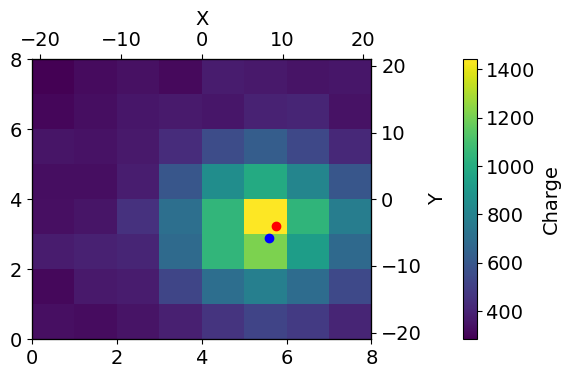

In [125]:
plot_image(dfi, df2c,  sel_events[1], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 0.6, yg1 =11.5
xg2 = 0.6, yg2 =11.5
4.114285714285715 6.190476190476191
4.285714285714286 6.20952380952381


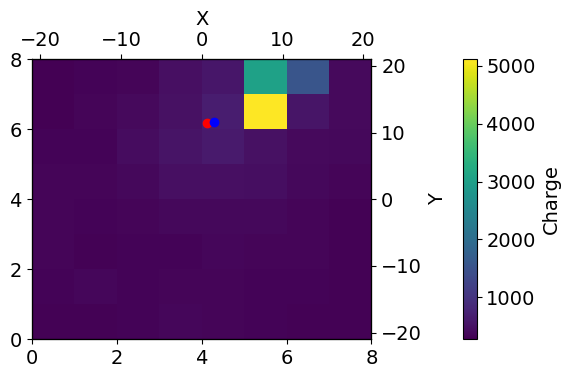

In [126]:
plot_image(dfi, df2c,  sel_events[2], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 7.3, yg1 =1.1
xg2 = 7.3, yg2 =1.1
5.390476190476191 4.20952380952381
5.390476190476191 4.20952380952381


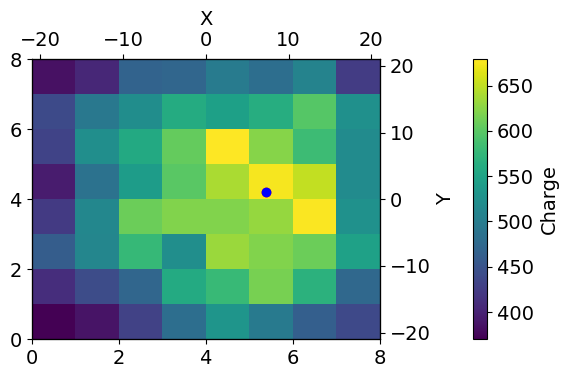

In [127]:
plot_image(dfi, df2c,  sel_events[3], x_spatial, y_spatial, figsize=(6, 4))